This tutorial was created using several sources, among others: 
https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import datasets

import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [2]:
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

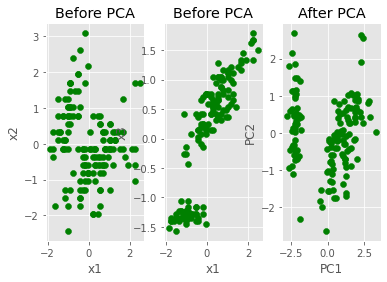

[0.72962445 0.22850762]


In [3]:
fig, axes = plt.subplots(1,3)
#axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].scatter(X[:,0], X[:,1], c="green")
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X[:,0], X[:,2], c="green")
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x3')
axes[1].set_title('Before PCA')
#axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[2].scatter(X_new[:,0], X_new[:,1], c="green")
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].set_title('After PCA')
plt.show()
print(pca.explained_variance_ratio_)


Text(0, 0.5, '$x_2$')

<Figure size 432x288 with 0 Axes>

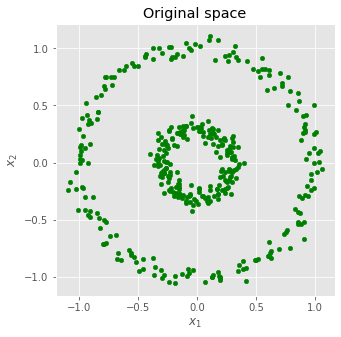

In [4]:
np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure()
plt.figure(figsize=(5, 5))
plt.title("Original space")
reds = y == 0
blues = y == 1

#plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolor='k')
#plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=20, edgecolor='k')
plt.scatter(X[reds, 0], X[reds, 1], c="green", s=20)
plt.scatter(X[blues, 0], X[blues, 1], c="green", s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


Text(0, 0.5, '$x_2$')

<Figure size 432x288 with 0 Axes>

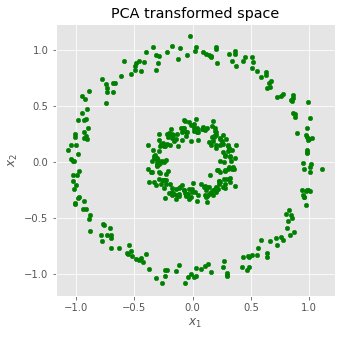

In [5]:
X_pca = PCA(n_components=2).fit_transform(X)


reds = y == 0
blues = y == 1

plt.figure()
plt.figure(figsize=(5, 5))
plt.title("PCA transformed space")
#plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red", s=20, edgecolor='k')
#plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue", s=20, edgecolor='k')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="green", s=20)
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="green", s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

DecisionStump :  0.69
LogisticRegression :  0.42
SVC_lin :  0.62


<Figure size 432x288 with 0 Axes>

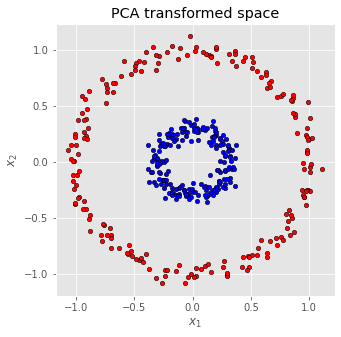

In [6]:
plt.figure()
plt.figure(figsize=(5, 5))
plt.title("PCA transformed space")
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue", s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y)

estimators = [
    ('DecisionStump', DecisionTreeClassifier(max_depth=1)),
    ('LogisticRegression',LogisticRegression()),
    ('SVC_lin', SVC(kernel='linear')),
]

for ename, emodel in estimators:
    print(ename, ': ', emodel.fit(X_train, y_train).score(X_test, y_test))


Text(0, 0.5, '$x_2$')

<Figure size 432x288 with 0 Axes>

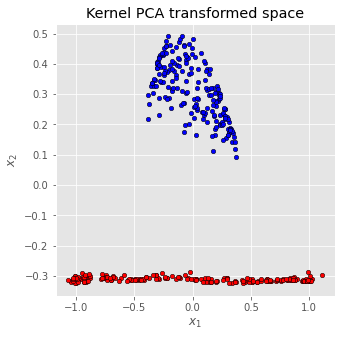

In [7]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)


reds = y == 0
blues = y == 1

plt.figure()
plt.figure(figsize=(5, 5))
plt.title("Kernel PCA transformed space")
plt.scatter(X_pca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_kpca, y, stratify=y)

estimators = [
    ('DecisionStump', DecisionTreeClassifier(max_depth=1)),
    ('LogisticRegression',LogisticRegression()),
    ('SVC_lin', SVC(kernel='linear')),
]

for ename, emodel in estimators:
    print(ename, ': ', emodel.fit(X_train, y_train).score(X_test, y_test))

DecisionStump :  1.0
LogisticRegression :  1.0
SVC_lin :  1.0


<Figure size 432x288 with 0 Axes>

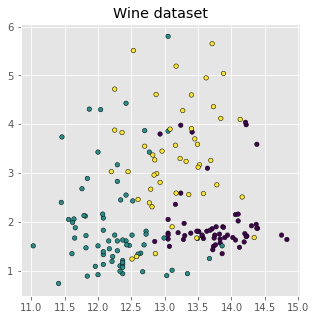

In [9]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

plt.figure()
plt.figure(figsize=(5, 5))
plt.title("Wine dataset")
plt.scatter(X[:,0], X[:,1], c=y,
            s=20, edgecolor='k')


Text(0.5, 1.0, 'LDA')

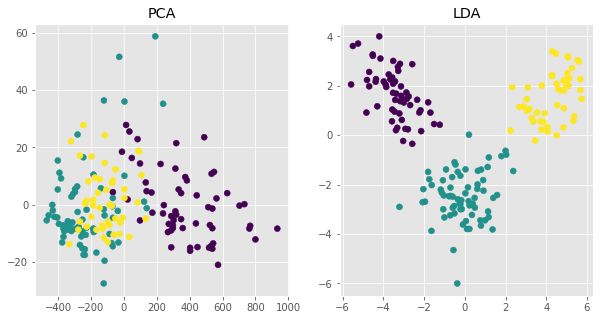

In [10]:
X_r_pca = PCA(n_components=2).fit(X).transform(X)
X_r_lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y).transform(X)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_r_pca[:, 0], X_r_pca[:, 1], c=y)
plt.title("PCA")
plt.subplot(122)
plt.scatter(X_r_lda[:, 0], X_r_lda[:, 1], c=y)
plt.title("LDA")